In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from folium import plugins
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')



In [2]:
train = pd.read_csv('M20_P8_train_agriculture.csv')
test = pd.read_csv('M20_P8_test_agriculture.csv')
train.head(50)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


In [3]:
train.Crop_Damage.value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [4]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
train.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,True,False,False,False
4595,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
test.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1194,False,False,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False,False


In [8]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [11]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [12]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1080.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.782083,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Here we can see numeric description which show us correlation among all columns also we can see positive and negative correlation which give us idea which attribute is more suitable for our model and data

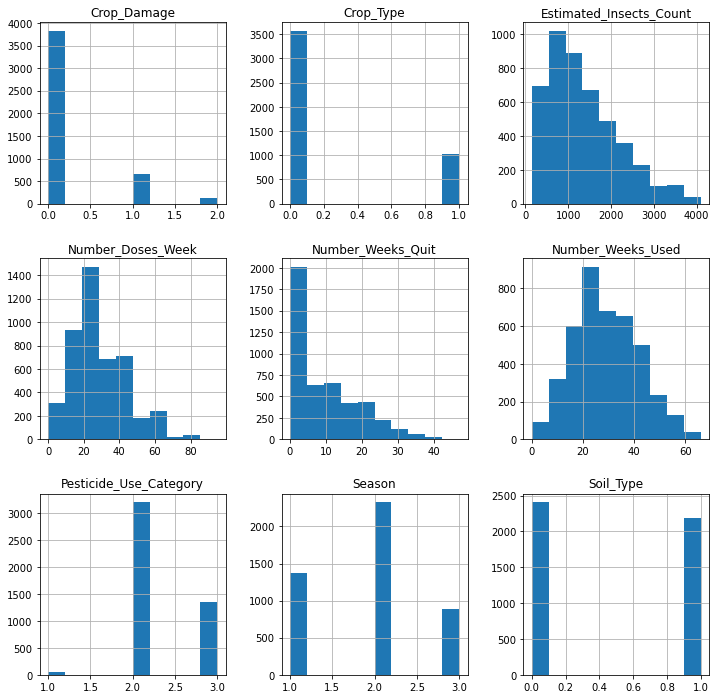

In [13]:
train.hist(figsize=(12,12));

In [14]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(),inplace=True)

In [15]:
train.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [16]:
train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [17]:
train['Number_Weeks_Used']=train['Number_Weeks_Used'].astype(int)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       4599 non-null   object
 1   Estimated_Insects_Count  4599 non-null   int64 
 2   Crop_Type                4599 non-null   int64 
 3   Soil_Type                4599 non-null   int64 
 4   Pesticide_Use_Category   4599 non-null   int64 
 5   Number_Doses_Week        4599 non-null   int64 
 6   Number_Weeks_Used        4599 non-null   int32 
 7   Number_Weeks_Quit        4599 non-null   int64 
 8   Season                   4599 non-null   int64 
 9   Crop_Damage              4599 non-null   int64 
dtypes: int32(1), int64(8), object(1)
memory usage: 341.5+ KB


In [19]:
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [20]:
le = LabelEncoder()
train['ID'] = le.fit_transform(train.ID.values)

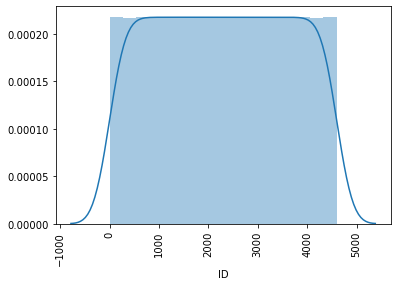

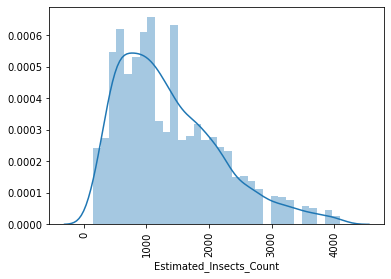

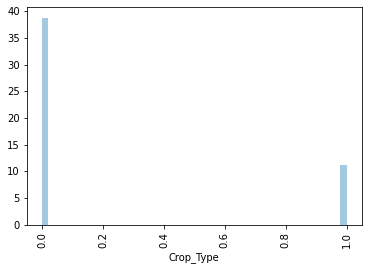

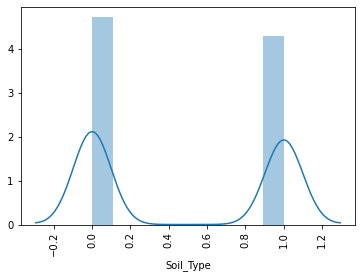

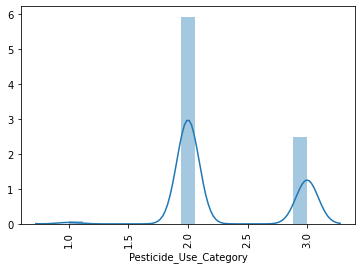

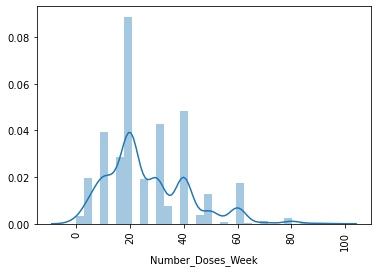

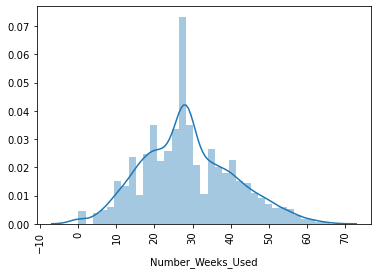

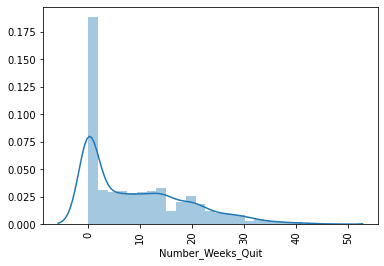

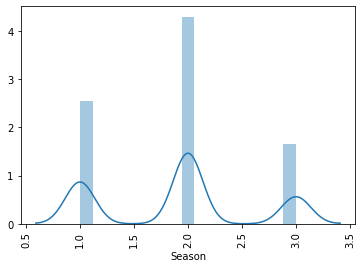

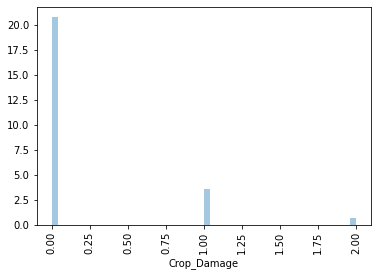

In [21]:
for i in train.describe().columns:
    sns.distplot(train[i])
    plt.xticks(rotation=90)
    plt.show()

we again create visual represantation for each attributes in test dataset we can see if there are skewness present in attributes

In [22]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.209152
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [23]:
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(),inplace=True)

In [24]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [25]:
test['ID'] = le.fit_transform(test.ID.values)

In [26]:
test.skew()

ID                         0.000000
Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

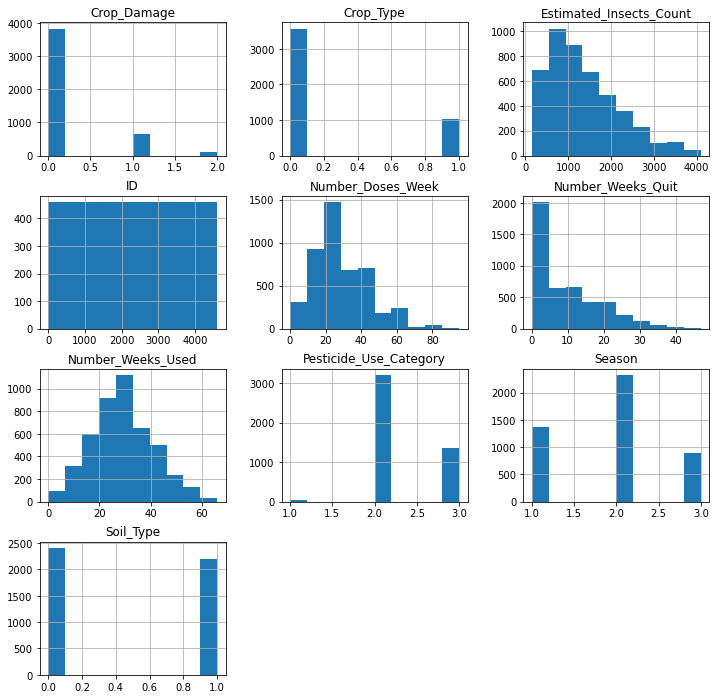

In [27]:
train.hist(figsize=(12,12));

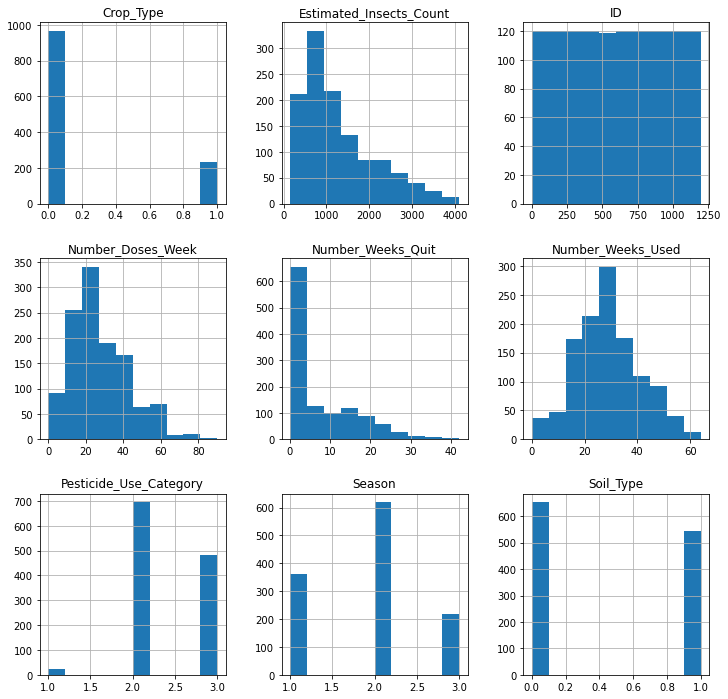

In [28]:
test.hist(figsize=(12,12));

In [29]:
df=pd.concat([train,test],ignore_index=True)

In [30]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.000000,0,1,0.0
1,1,209,1,0,1,0,0.000000,0,2,1.0
2,2,257,1,0,1,0,0.000000,0,2,1.0
3,3,257,1,1,1,0,0.000000,0,2,1.0
4,4,342,1,0,1,0,0.000000,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
5793,1194,1132,0,1,2,40,34.000000,7,3,NaN
5794,1195,1132,0,1,2,40,25.000000,3,1,NaN
5795,1196,1132,0,1,2,20,13.000000,23,1,NaN
5796,1197,1212,0,1,2,10,35.000000,5,1,NaN


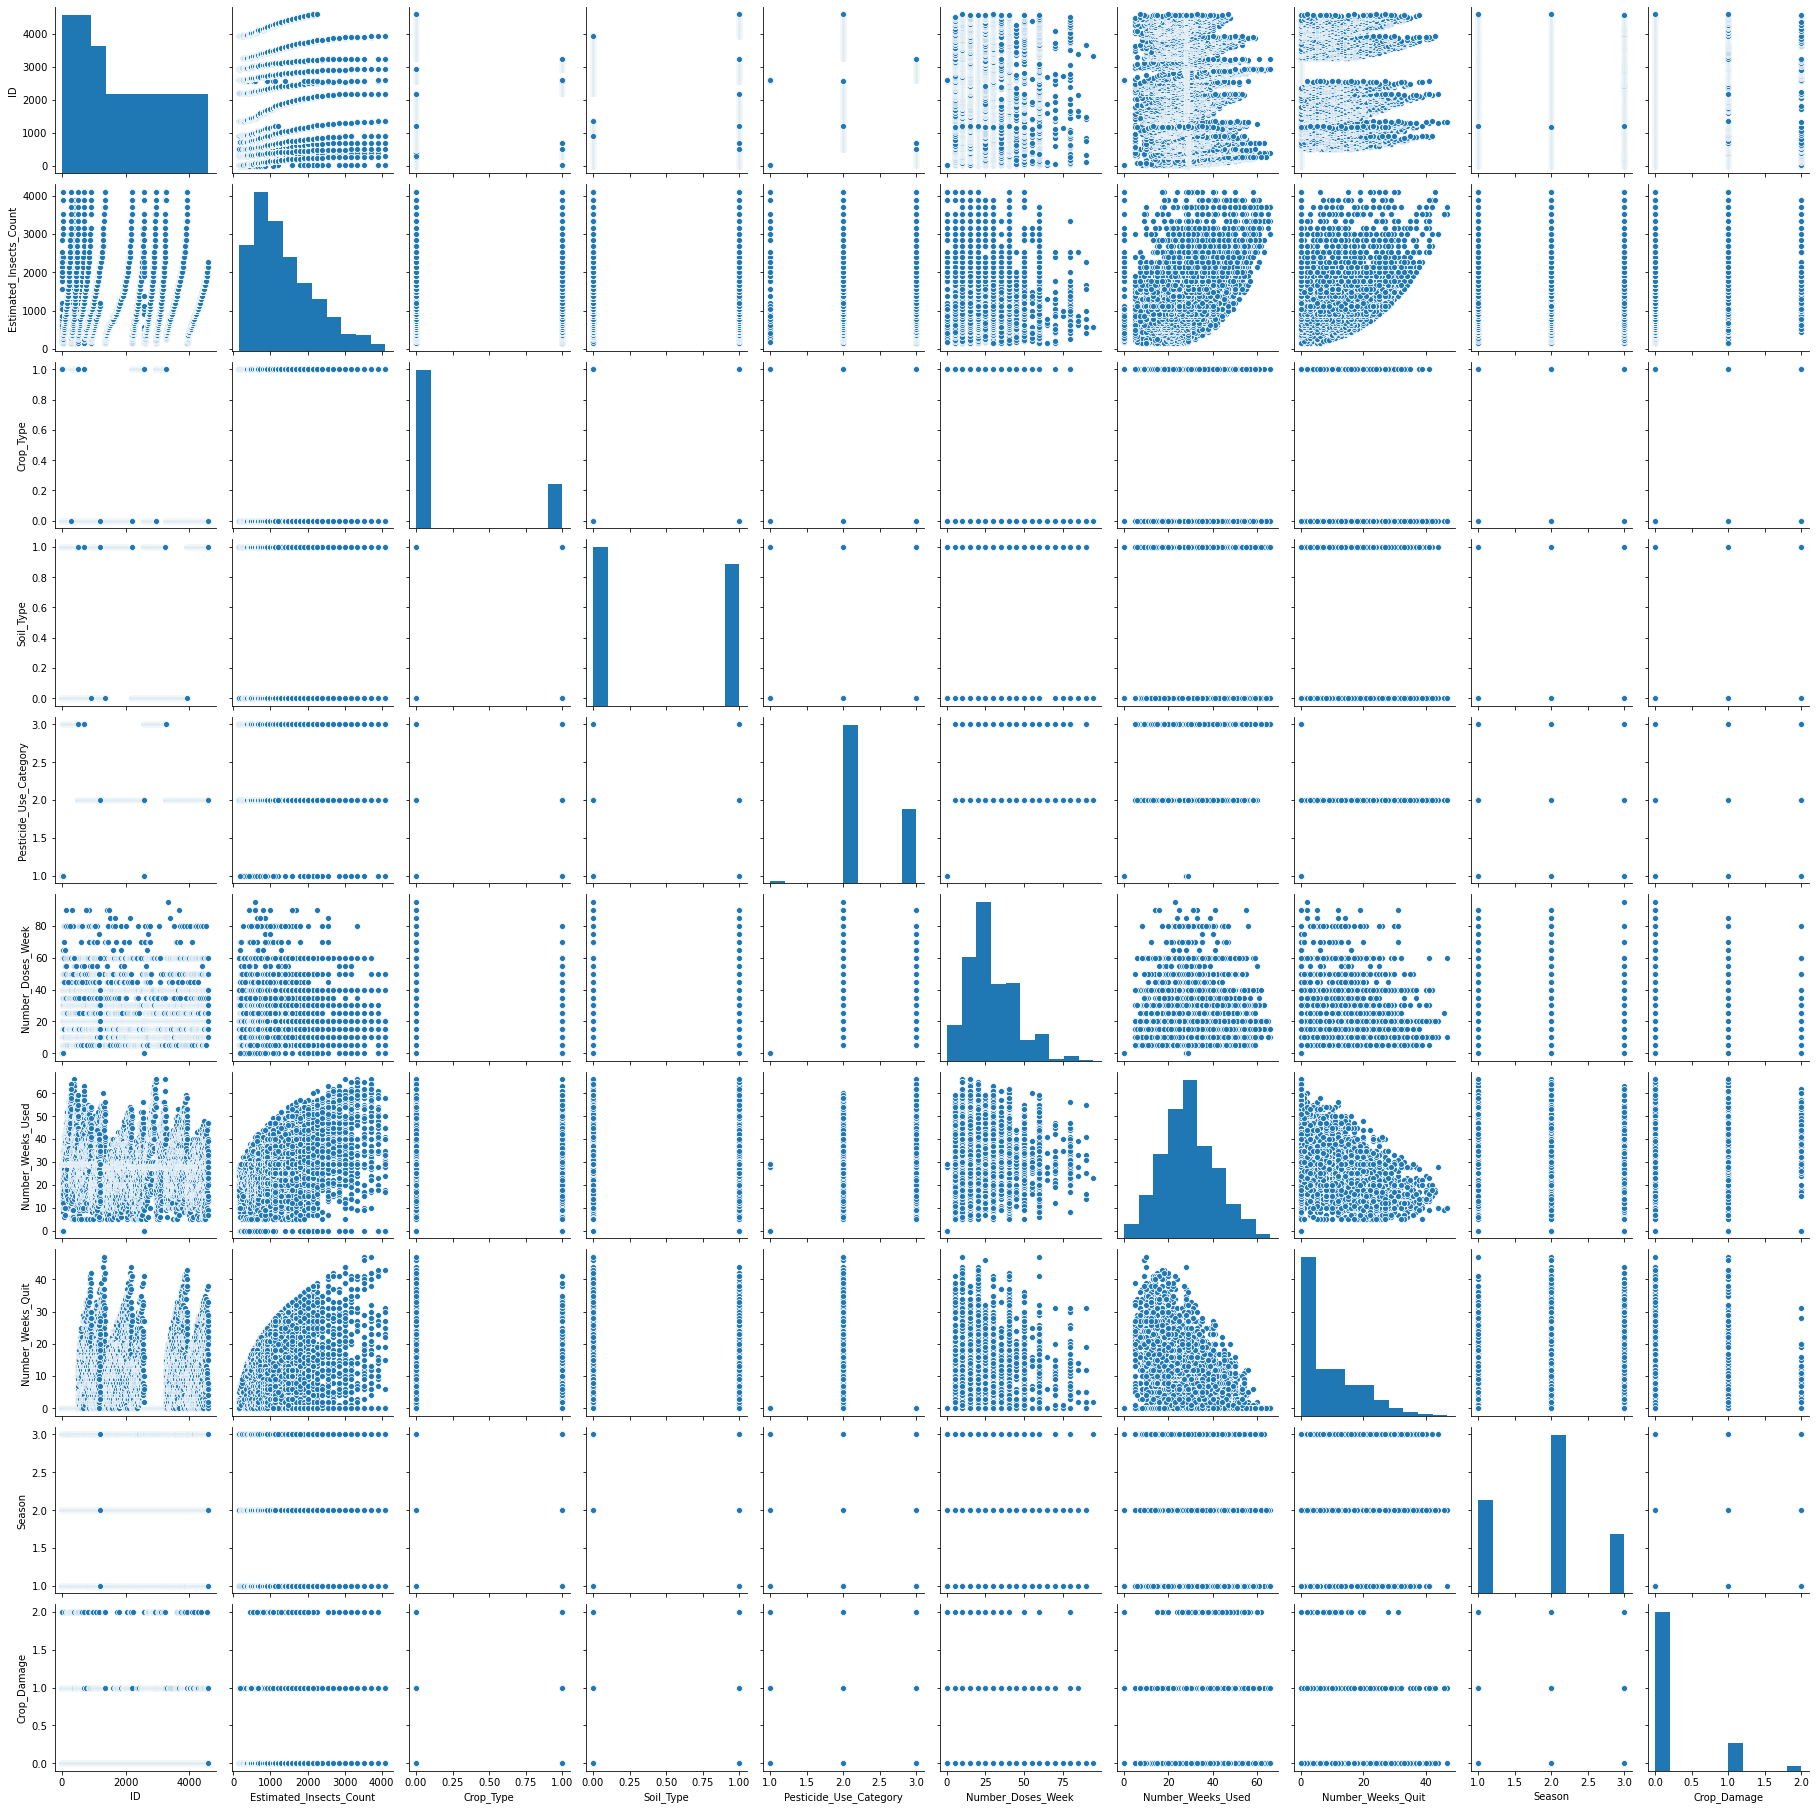

In [31]:
sns.pairplot(df)

here we are looking to pairplot it showing us plot for all attribute

In [32]:
df['Crop_Damage'].fillna(df['Crop_Damage'].median(),inplace=True)

In [33]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [34]:
le = LabelEncoder()
train['ID'] = le.fit_transform(train.ID.values)

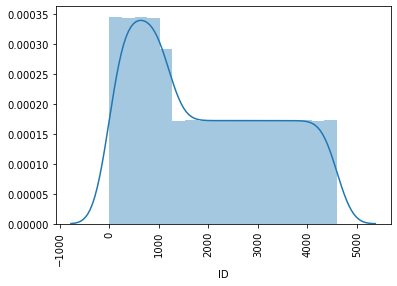

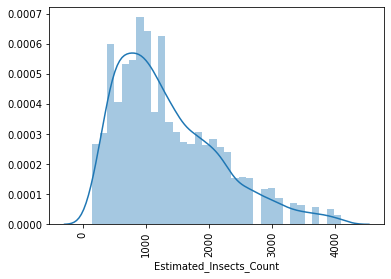

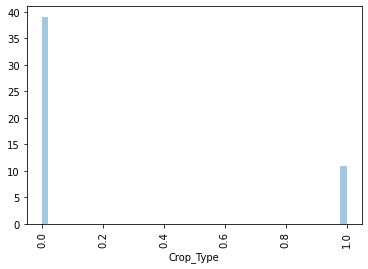

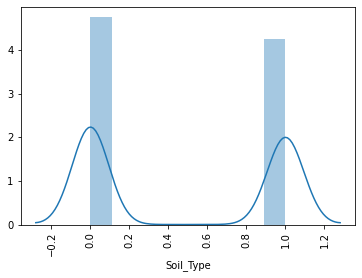

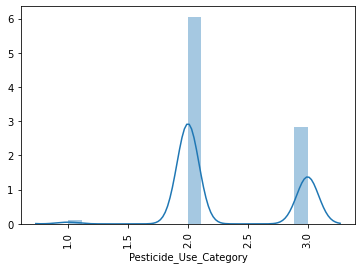

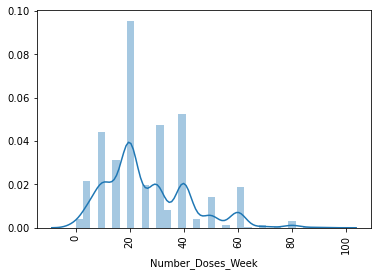

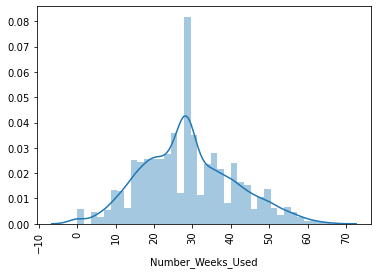

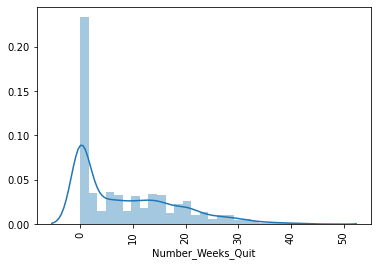

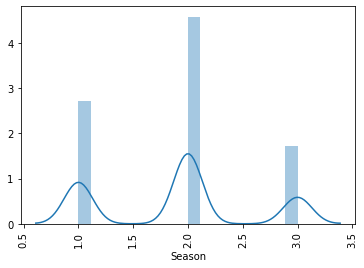

In [35]:
for i in test.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

we again create visual represantation for each attributes in test dataset we can see if there are skewness present in attributes

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   int32  
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5798 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              5798 non-null   float64
dtypes: float64(2), int32(1), int64(7)
memory usage: 430.4 KB


In [37]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [38]:
df.skew()

ID                         0.345227
Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.283099
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.721552
dtype: float64

In [39]:
for col in train.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [40]:
df.skew()

ID                         0.345227
Estimated_Insects_Count   -0.451164
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week         -1.263559
Number_Weeks_Used          0.283099
Number_Weeks_Quit         -0.117645
Season                     0.147252
Crop_Damage                2.361921
dtype: float64

We can see here there re no major Skewness in dataset

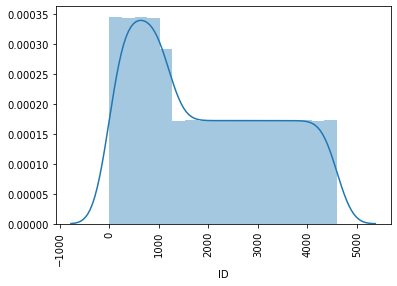

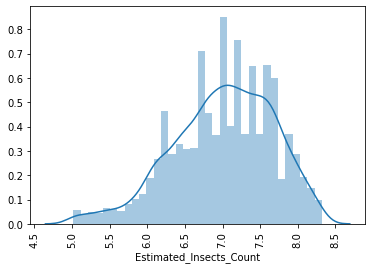

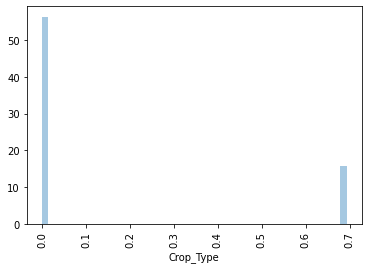

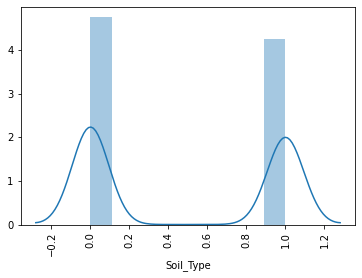

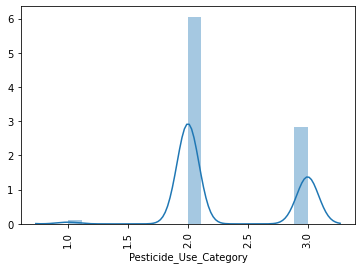

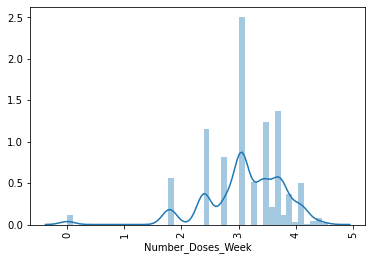

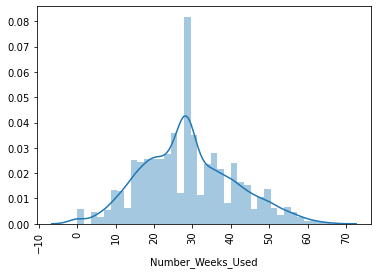

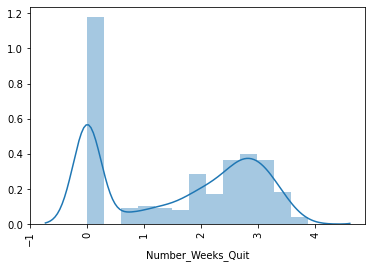

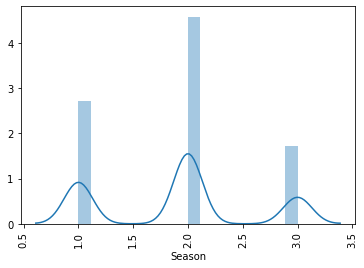

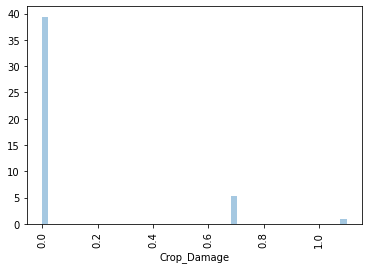

In [41]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

we again create visual represantation for each attributes in df dataset we can see if there are skewness present in attributes

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text major ticklabel objects>)

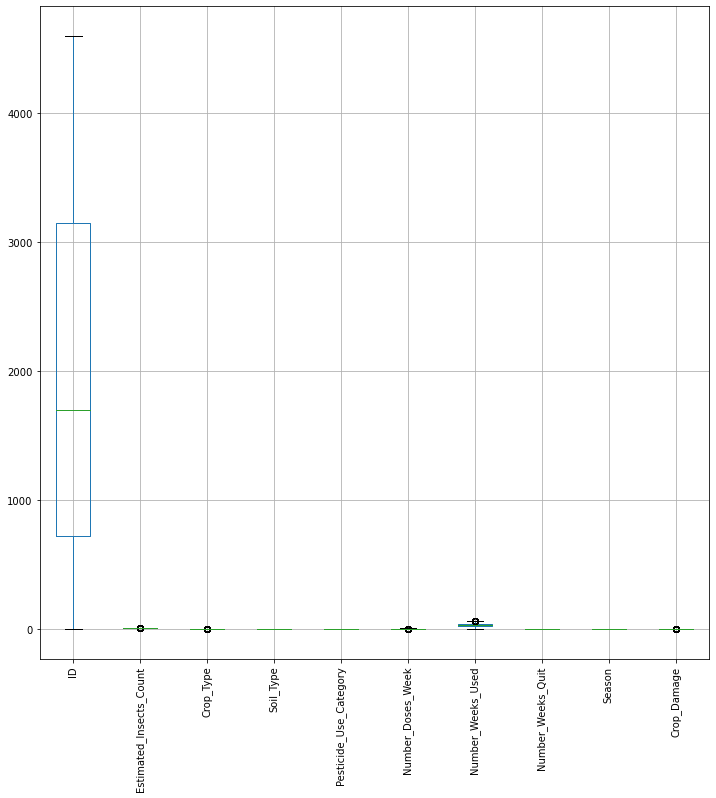

In [42]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

we are looking for some major outlier in dataset but there no major outliers

In [43]:
y = df['Season']
x = df.drop('Season', axis=1)
x

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage
0,0,5.241747,0.693147,0,1,0.000000,0.000000,0.000000,0.000000
1,1,5.347108,0.693147,0,1,0.000000,0.000000,0.000000,0.693147
2,2,5.552960,0.693147,0,1,0.000000,0.000000,0.000000,0.693147
3,3,5.552960,0.693147,1,1,0.000000,0.000000,0.000000,0.693147
4,4,5.837730,0.693147,0,1,0.000000,0.000000,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...
5793,1194,7.032624,0.000000,1,2,3.713572,34.000000,2.079442,0.000000
5794,1195,7.032624,0.000000,1,2,3.713572,25.000000,1.386294,0.000000
5795,1196,7.032624,0.000000,1,2,3.044522,13.000000,3.178054,0.000000
5796,1197,7.100852,0.000000,1,2,2.397895,35.000000,1.791759,0.000000


We are spliting data here for df dataframe

In [44]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25, random_state=1)

In [45]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [46]:
smoothing={'var_smoothing':[1e-09,None]}
model_test= GaussianNB()
grid=GridSearchCV(estimator=model_test, param_grid=smoothing)

In [47]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.var_smoothing)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, None]})
0.5064396915466318
1e-09
{'var_smoothing': 1e-09}
/n


In [48]:
wei={'weights':['uniform','distance']}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=wei)

In [49]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.weights)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'weights': ['uniform', 'distance']})
0.41904157242437473
uniform
{'weights': 'uniform'}
/n


In [50]:
neighbor={'n_neighbors':[5,1,2,8,6,10,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=neighbor)

In [51]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 1, 2, 8, 6, 10, 15, 20]})
0.46481250744018093
20
{'n_neighbors': 20}
/n


In [52]:
leaf={'leaf_size':[50,10,20,80,60,10,30,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=leaf)

In [53]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.leaf_size)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [50, 10, 20, 80, 60, 10, 30, 15, 20]})
0.41904157242437473
50
{'leaf_size': 50}
/n


In [54]:
n_esti={'n_estimators':[50,100,200,800,600,150,300,250,120]}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=n_esti)

In [55]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 800, 600, 150, 300, 250,
                                          120]})
0.43905532849225554
600
{'n_estimators': 600}
/n


In [56]:
cri={'criterion':['gini', 'entropy']}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=cri)

In [57]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.43399494729045146
gini
{'criterion': 'gini'}
/n


In [58]:
leafS={'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,12,14]}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=leafS)

In [59]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                              14]})
0.49838842373979875
14
{'min_samples_leaf': 14}
/n


We used GridSearchCV for using best parameter in our model

In [67]:


model=[LogisticRegression(), SVC(),GaussianNB(var_smoothing=1e-09), DecisionTreeClassifier(),KNeighborsClassifier(weights='uniform',leaf_size=50,n_neighbors=20),RandomForestClassifier(criterion='gini',n_estimators=600,min_samples_leaf=14)]


for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.8471014492753624
[[1154   14    0]
 [ 168   15    0]
 [  27    2    0]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1168
           1       0.48      0.08      0.14       183
           2       0.00      0.00      0.00        29

    accuracy                           0.85      1380
   macro avg       0.45      0.36      0.35      1380
weighted avg       0.79      0.85      0.79      1380



Accuracy Score of SVC() is :
0.8463768115942029
[[1168    0    0]
 [ 183    0    0]
 [  29    0    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1168
           1       0.00      0.00      0.00       183
           2       0.00      0.00      0.00        29

    accuracy                           0.85      1380
   macro avg       0.28      0.33      0.31      1380
weighted avg       0.72      0.85      0.78      1380



Accuracy Scor

In [69]:
import joblib
joblib.dump(RandomForestClassifier(),'M20_P10_agriculture_Season.obj')

['M20_P10_agriculture_Season.obj']

In [70]:
train.Crop_Damage.value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [71]:
A = train['Crop_Damage']
B = train.drop('Crop_Damage', axis=1)
B

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0,0,1
1,1,209,1,0,1,0,0,0,2
2,2,257,1,0,1,0,0,0,2
3,3,257,1,1,1,0,0,0,2
4,4,342,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,28,1,1
4595,4595,2139,0,1,2,30,47,2,1
4596,4596,2267,0,1,2,10,7,27,2
4597,4597,2267,0,1,2,10,20,24,2


We are spliting data here for train dataframe

In [64]:
train_x,test_x,train_y,test_y=train_test_split(B,A,test_size=.30, random_state=1)

In [72]:


model1=[LogisticRegression(), SVC(),GaussianNB(var_smoothing=1e-09), DecisionTreeClassifier(),KNeighborsClassifier(weights='uniform',leaf_size=50,n_neighbors=20),RandomForestClassifier(criterion='gini',n_estimators=600,min_samples_leaf=14)]

for m in model1:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.8471014492753624
[[1154   14    0]
 [ 168   15    0]
 [  27    2    0]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1168
           1       0.48      0.08      0.14       183
           2       0.00      0.00      0.00        29

    accuracy                           0.85      1380
   macro avg       0.45      0.36      0.35      1380
weighted avg       0.79      0.85      0.79      1380



Accuracy Score of SVC() is :
0.8463768115942029
[[1168    0    0]
 [ 183    0    0]
 [  29    0    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1168
           1       0.00      0.00      0.00       183
           2       0.00      0.00      0.00        29

    accuracy                           0.85      1380
   macro avg       0.28      0.33      0.31      1380
weighted avg       0.72      0.85      0.78      1380



Accuracy Scor

In [73]:
import joblib
joblib.dump(RandomForestClassifier(),'M20_P10_agriculture_Crop_Damage.obj')

['M20_P10_agriculture_Crop_Damage.obj']